#911 CALLS CAPSTONE PROJECT

For this capstone project we will be analyzing some 911 call data from Kaggle.

In [1]:
#Import pandas and numpy
import numpy as np
import pandas as pd

In [3]:
#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Set Matplotlib Style
sns.set_style('whitegrid')

In [7]:
#Read CSV and set it to df
df = pd.read_csv('911.csv')

In [9]:
#Check Info Of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [11]:
#Check head of df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [17]:
#Top 5 zipcodes For 911 calls
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [23]:
#Top 5 townships for 911 calls
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [31]:
#How many unique title codes are there?
df['title'].nunique()

110

In [37]:
#In the titles column there are "Reasons/Departments" specified before the
#title code. These are EMS, Fire, and Traffic. Use .apply() to create a new 
#column called "Reason" that contains this string value. For example, if the 
#title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

def myy(n):
    idx = n.find(':')
    return n[:idx]
df['Reason']=df['title'].apply(myy)

In [39]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [41]:
#Most common Reason for a 911 call based off of this new column
df['Reason'].value_counts().head(1)

Reason
EMS    48877
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

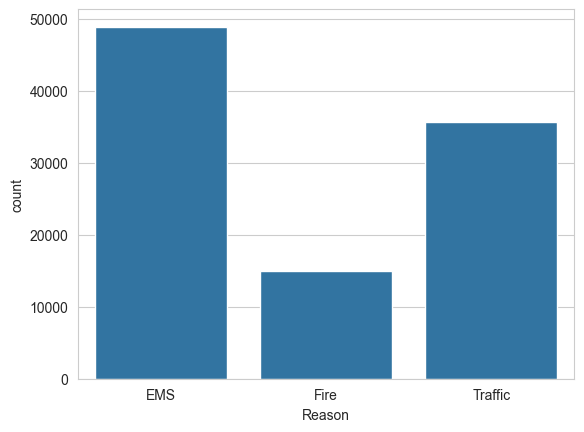

In [45]:
#Create A Countplot of 911 calls by Reason
sns.countplot(x='Reason',data=df)

In [51]:
#What is dtype of timestamp column?
type(df['timeStamp'].iloc[0])

str

In [53]:

df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [ ]:
#Coverted strs to datetime to get specific attributes

In [55]:
#Now that the timestamp column are actually DateTime objects, use .apply() 
#to create 3 new columns called Hour, Month, and Day of Week .We can create 
#these columns based off of the timeStamp column.
def hh(n):
    return n.hour
def mm(n):
    return n.month
def dyy(n):
    return n.dayofweek
df['Hour']=df['timeStamp'].apply(hh)
df['Month']=df['timeStamp'].apply(mm)
df['Day Of Week']=df['timeStamp'].apply(dyy)

In [63]:
#Now Let's change day of week to their names 
#{0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
names = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
def nyme(n):
    return names[n]
df['Day Of Week']=df['Day Of Week'].apply(nyme)

<Axes: xlabel='Day Of Week', ylabel='count'>

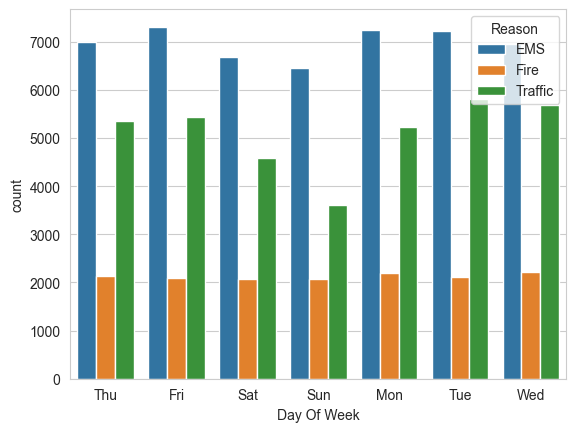

In [69]:
#Countplot of Day of Week with hue based off Reason
sns.countplot(x='Day Of Week',data=df,hue='Reason')

<Axes: xlabel='Month', ylabel='count'>

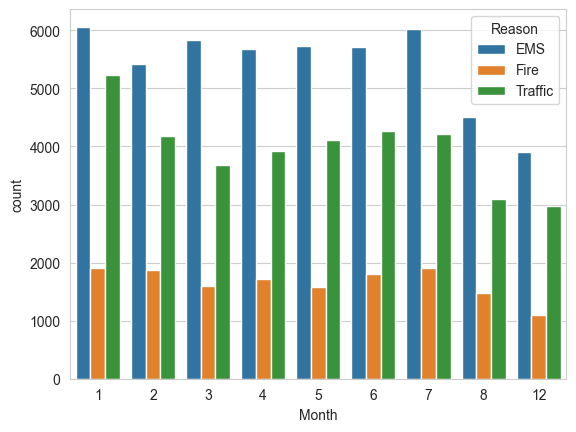

In [71]:
#Same For Month
sns.countplot(x='Month',data=df,hue='Reason')

In [73]:
#We are having some missing data from 9,10,11
#Sol -> Now create a gropuby object called byMonth, where you group the 
#DataFrame by the month column and use the count() method for aggregation. 
#Use the head() method on this returned DataFrame
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='Month'>

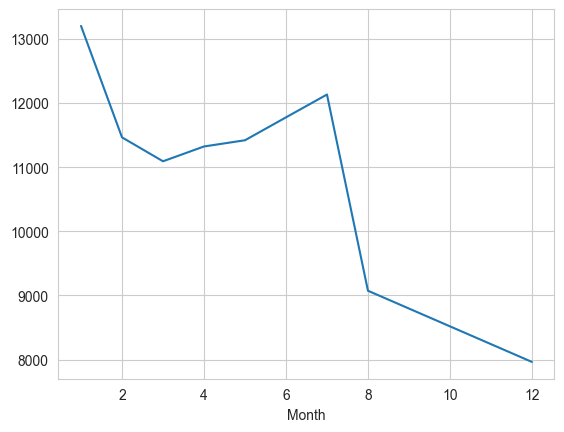

In [77]:
#Create a simple plot off of the dataframe indicating the count of calls per 
#month.
byMonth['twp'].plot()

In [81]:
#Restructure the dataframe so that the columns become the Hours and the Index 
#becomes the Day of the Week
dayHour = df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='Hour', ylabel='Day Of Week'>

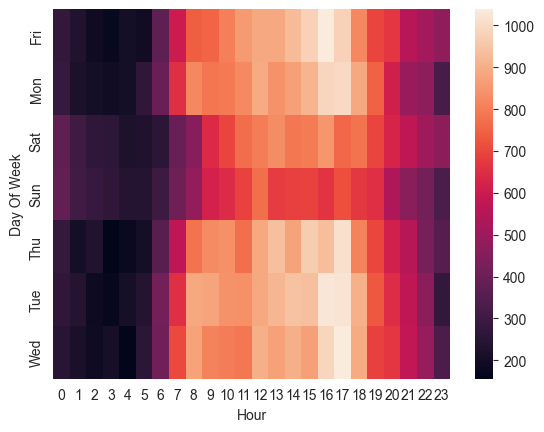

In [87]:
#HeatMap Of DayHour
sns.heatmap(dayHour)

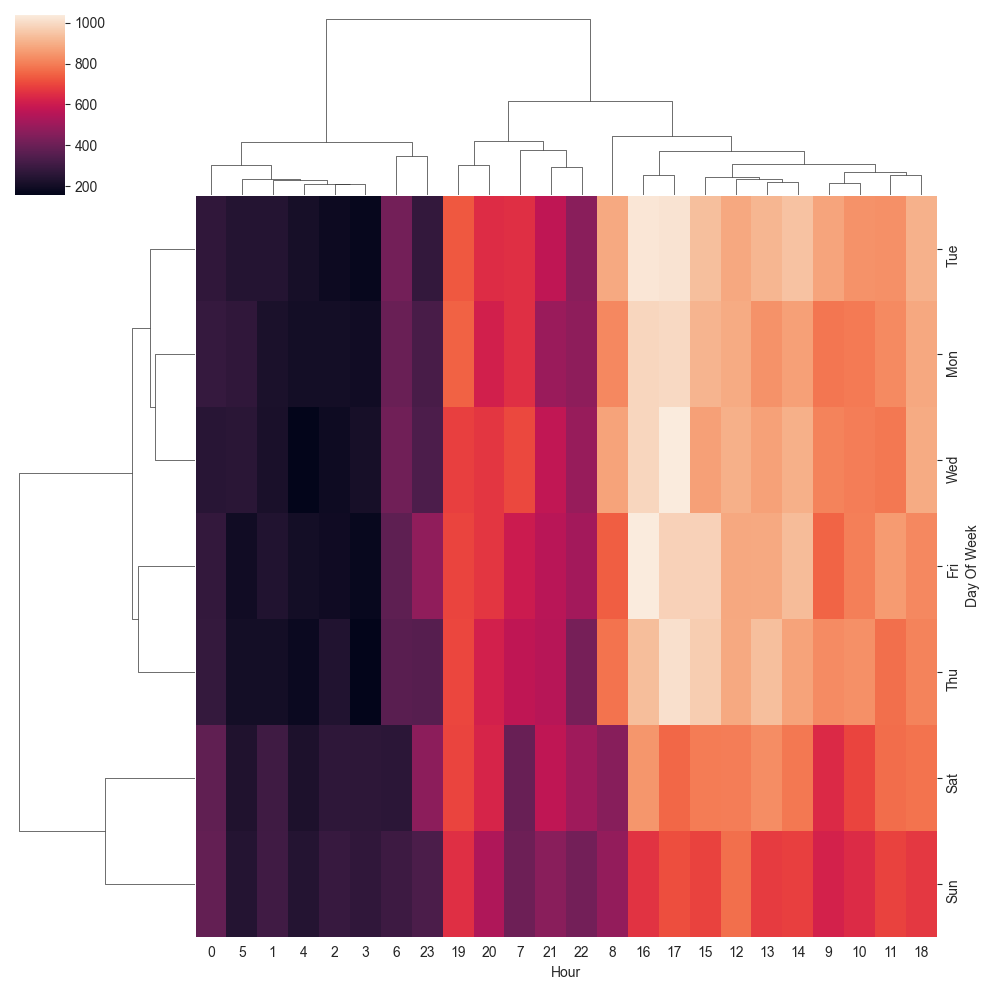

In [89]:
#Clustermap on dayHour
sns.clustermap(dayHour)

#END OF NOTEBOOK

#CREATED BY SHAURYA MITTAL